## Regrssion Model

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
mean = train_data.mean(axis =0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]
std = train_data.std(axis = 0)
train_data = train_data/std


# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]
test_data = test_data-mean
test_data = test_data/std

- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. 
- Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

### 모델 구성 및 컴파일

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]

def build_model():
    model = models.Sequential()
    #model.add(layers.Input(shape=(5252,)))
    model.add(layers.Dense(64 , activation = 'relu'))
    model.add(layers.Dense(128 , activation = 'relu'))
    model.add(layers.Dense(1))
    return model

In [5]:
model = build_model()
model.compile(loss='mse',
              optimizer='SGD',
              metrics=['mae'])

### 모델 학습

In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.3,
                                                  random_state=123)

history = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val))

Epoch 1/60
9/9 [==============================] - 1s 19ms/step - loss: 311.9570 - mae: 14.9882 - val_loss: 512.0542 - val_mae: 20.5395
Epoch 2/60
9/9 [==============================] - 0s 5ms/step - loss: 220.0167 - mae: 11.1785 - val_loss: 468.7361 - val_mae: 19.6057
Epoch 3/60
9/9 [==============================] - 0s 5ms/step - loss: 204.2078 - mae: 10.7297 - val_loss: 171.6781 - val_mae: 9.7229
Epoch 4/60
9/9 [==============================] - 0s 5ms/step - loss: 88.8930 - mae: 6.8540 - val_loss: 19.2665 - val_mae: 3.1544
Epoch 5/60
9/9 [==============================] - 0s 5ms/step - loss: 21.7624 - mae: 3.1978 - val_loss: 17.8497 - val_mae: 3.0290
Epoch 6/60
9/9 [==============================] - 0s 5ms/step - loss: 19.9117 - mae: 3.1534 - val_loss: 24.4201 - val_mae: 3.6172
Epoch 7/60
9/9 [==============================] - 0s 5ms/step - loss: 18.4701 - mae: 2.9004 - val_loss: 16.4515 - val_mae: 3.1169
Epoch 8/60
9/9 [==============================] - 0s 5ms/step - loss: 14.5385 

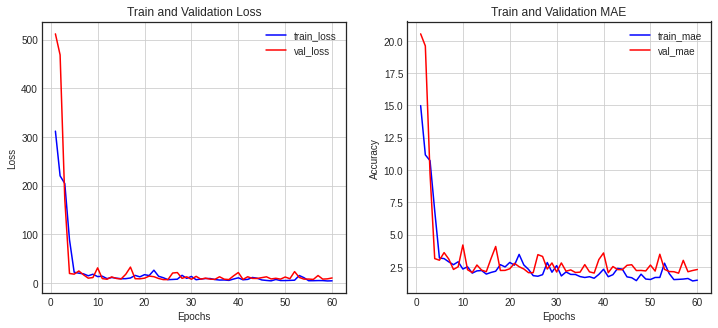

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
- 테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [8]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 20.9374 - mae: 2.8052


[20.937442779541016, 2.8052003383636475]

In [9]:
pred_data = model.predict(test_data)

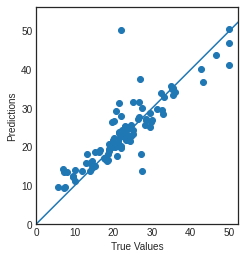

In [10]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

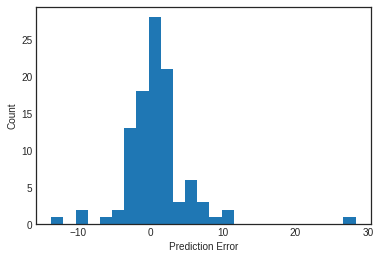

In [11]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

참고 링크 : https://www.tensorflow.org/tutorials/keras/regression?hl=ko